In [1]:
!mkdir -p results results/double_dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_pong

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('PongDeterministic-v4')
env = Monitor(env, './monitor/double_dqn/pong', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_pong, replay_memory_size=0)
agent.model.load_weights('./models/double_dqn/pong.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<PongDeterministic-v4>>>>,
    downsample=Downsampler(y=(34, 16), x=(15, 15), cut=[107, 87]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x7f9f3c0dceb8>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x7f9ef5098268>,
    image_size=(84, 84),
    render_mode='human'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [07:37<00:00,  4.57s/game]


0     19.0
1     19.0
2     15.0
3     18.0
4     17.0
5     17.0
6     19.0
7     18.0
8     18.0
9     16.0
10    16.0
11    17.0
12    18.0
13    19.0
14    17.0
15    18.0
16    18.0
17    14.0
18    15.0
19    19.0
20    19.0
21    18.0
22    14.0
23    18.0
24    17.0
25    17.0
26    19.0
27    19.0
28    17.0
29    18.0
      ... 
70    19.0
71    18.0
72    17.0
73    18.0
74    19.0
75    19.0
76    17.0
77    19.0
78    16.0
79    19.0
80    17.0
81    18.0
82    16.0
83    18.0
84    12.0
85    17.0
86    19.0
87    17.0
88    17.0
89    16.0
90    19.0
91    19.0
92    18.0
93    18.0
94    17.0
95    17.0
96    19.0
97    19.0
98    15.0
99    16.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/double_dqn/fully-deterministic.csv')

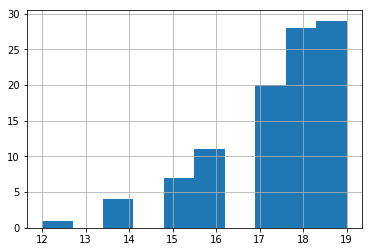

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.00000
mean      17.44000
std        1.50635
min       12.00000
25%       17.00000
50%       18.00000
75%       19.00000
max       19.00000
dtype: float64